In [ ]:
# Cargar autenticación de Google para poder cargar los archivos
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
# Carga de todos los csv que componen el CIC-IDS-2018 a un solo DataFrame de Pandas

ids = ['1qcnBAkJzZlLMHxeQztEJ8pu9h438OksU','1Xz0jLd8dkUiifOFEFvCxGsnsF1N07zOr','1Xz0jLd8dkUiifOFEFvCxGsnsF1N07zOr','1QotaesVIgNqisZrf2fFDDSSo0Bkw2jIC', '1c7eq8zKDN6v3y4yf9gbrOH0K-fOONlb4','1BQCLnXOtyaQueNGKYgeEHo5oXvo2iNso','1IaKsgZ3ccZXC4cTwe5oX5FvE714PA_ug','1v-gfO-1BBrS94mE64175BTeN68LaP7Ua','1OsXQuV0gy0qC4ri1qLXpRGbwYxA7slm_','1qJMvgNXDOQOIlR5EO0-gFsYnJJzdRIxi','1Wff-_HYEjqc0bWM7Rgrv-7TlfPlbJD9m','1HQT33xO7amR7AfMLY55gUnW4bunKEcbW','1Uu48ZkF0KQMt1BOppiEbLyFZz5ABuJkj','1Hih7FW6_mAyrT8EwSSGPXDYBHbbeq1m_','1xlGeRm7lLFC0updZoNHxsyaEkax-8uu_','15-W-zTCX_VZkLbUUnVMC755qolZ7iYXe','18z2GHPszz1A4C7ViXCNHH0R9Sqtfjt_k','1-xraPAAnNsJcWvN00VJInrfNuPX3DC57','1lrn6XqiFf_APDJvm_wVLs5jLHWDRXUx6','1Xz0jLd8dkUiifOFEFvCxGsnsF1N07zOr']
i = 0
df_list = []
for id in ids:
  #print('Principio iteración' + str(i+1))
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('CIC-IDS-2018-' + str(i) + '.csv') 
  df = pd.read_csv('CIC-IDS-2018-' + str(i) + '.csv')
  df_list.append(df)
  #print('Final iteración' + str(i+1))
  i = i + 1
df = pd.concat(df_list)

In [ ]:
df = df.drop_duplicates()

In [ ]:
le = preprocessing.LabelEncoder()
df['Label'] = le.fit_transform(df.Label.values)

In [ ]:
X = df.drop(['Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Active Mean', 'Active Std', 'Idle Mean', 'Idle Std', 'Label', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Max', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'Total Backward Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd Header Length', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min']
           , axis=1)
y = df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

In [ ]:
#roc auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

clf = RandomForestClassifier(criterion='gini', n_estimators = 40, random_state = 42, min_samples_split=5, min_samples_leaf=1, max_features='auto', n_jobs=-1)
y_pred = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

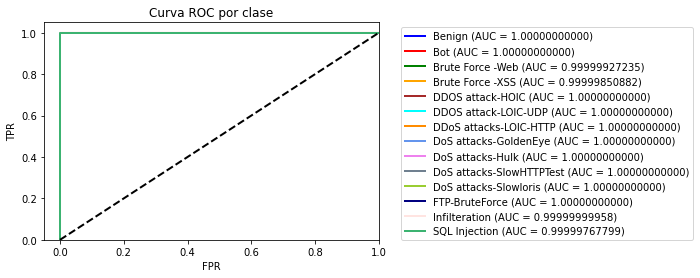

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

target_names = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
       'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP', 'DDoS attacks-LOIC-HTTP',
       'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest',
       'DoS attacks-Slowloris', 'FTP-BruteForce', 'Infilteration',
       'SQL Injection']

lw=2
y_ts = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
n_classes = 14

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'brown', 'aqua', 'darkorange', 'cornflowerblue', 'violet', 'slategray', 'yellowgreen', 'navy', 'mistyrose', 'mediumseagreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='%s (AUC = %0.11f)' % (target_names[i],roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC por clase')
plt.legend(bbox_to_anchor=(1.05, 1))
#plt.show()
plt.savefig('roc', format='png', dpi=1000, bbox_inches='tight')

In [ ]:
!pip install --upgrade gupload

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1wJNHfUVkFzFvSl3HpcLSiHYFcclsXveQ' roc